## Data Analysis Final Project

## Group 27

### Students Names :
 Sivan Hiya , 
 Yuval Bierbach ,
 Tal Elrom
 
 
 <a id='top'></a>

<div>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%A9%D7%A2%D7%A8%20%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpg?raw=true width="400"/>
</div>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from PIL import Image
import io

#### Why we choose this data?

 It's important to talk about postpartum depression because it's a serious problem that affects many new mothers. When we talk about it, more people understand what it is, and it's easier for women to get help if they need it. Also, when we talk openly about postpartum depression, it helps remove the shame or embarrassment some women might feel about it. This means they're more likely to seek support and treatment. Plus, when more people know about postpartum depression, it can lead to better policies and services to help women who are struggling.

#### Information on the data

This research was conducted at the Chittagong Medical Hospital located in Bangladesh.

The study was conducted on 1503 women who had postpartum depression.

The data was published on [Kaggle](https://www.kaggle.com/datasets/chrico03/railroad-accident-and-incident-data) website

In [26]:
url = 'https://raw.githubusercontent.com/sivanhiya/sivanhiya/main/PostPartumData.csv'
postp_df = pd.read_csv(url)
postp_df.shape

(1503, 11)

In [27]:
postp_df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [28]:
postp_df

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [29]:
postp_df.loc[ : , :].isnull().sum().to_frame('nulls')

,nulls
Timestamp,0
Age,0
Feeling sad or Tearful,0
Irritable towards baby & partner,6
Trouble sleeping at night,0
Problems concentrating or making decision,12
Overeating or loss of appetite,0
Feeling anxious,0
Feeling of guilt,9
Problems of bonding with baby,0


As you can see, the amount of missing values in the study is very minimal, so we did not emphasize it in the data analysis

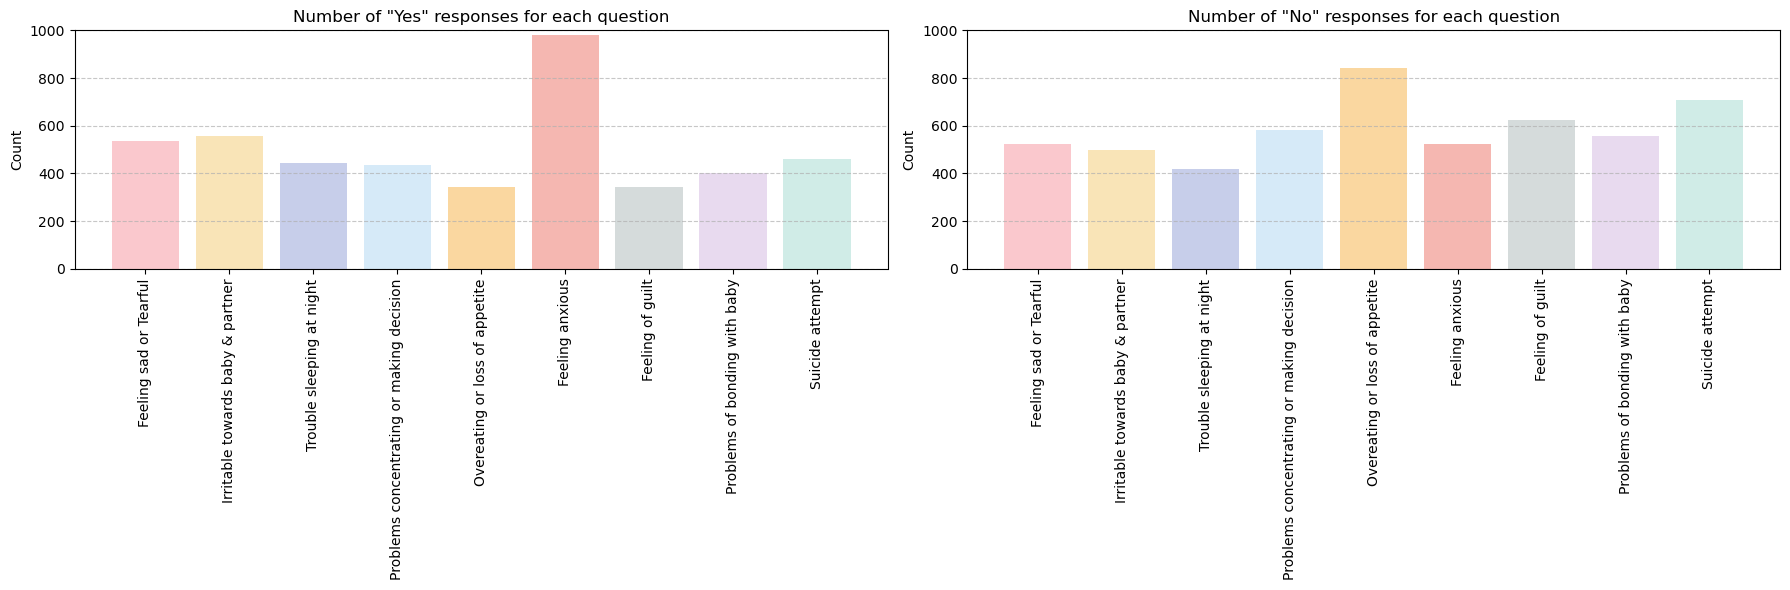

In [30]:
questions = postp_df.columns[2:] 
pastel_colors = ['#FAC8CD', '#F9E4B7', '#C7CEEA', '#D6EAF8', '#FAD7A0', '#F5B7B1', '#D5DBDB', '#E8DAEF', '#D0ECE7']
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1, 2, 1)
plt.ylim(0, 1000)
for idx, question in enumerate(questions):
    yes_responses = postp_df[postp_df[question] == 'Yes']
    yes_count = len(yes_responses)  
    plt.bar(question, yes_count, color=pastel_colors[idx % len(pastel_colors)])

plt.title('Number of "Yes" responses for each question')
plt.xlabel('Question')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
ax2=plt.subplot(1, 2, 2)
for idx, question in enumerate(questions):
    no_responses = postp_df[postp_df[question] == 'No']
    no_count = len(no_responses)  
    plt.bar(question, no_count, color=pastel_colors[idx % len(pastel_colors)])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.title('Number of "No" responses for each question')
plt.xlabel('Question')
plt.ylabel('Count')
plt.ylim(0, 1000)
plt.xticks(rotation=90)
ax1.set_xlabel("")
ax2.set_xlabel("")
plt.tight_layout()
plt.show()


## Age Groups

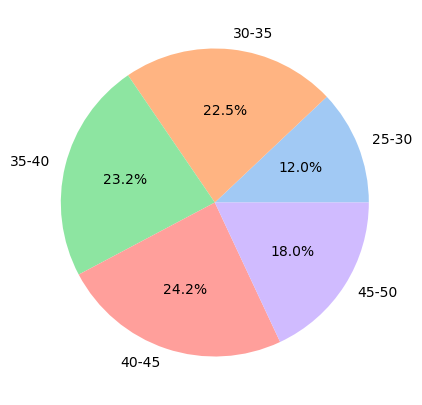

In [31]:
sizes = [181, 338, 349, 364, 271]
labels = ["25-30", "30-35", "35-40", "40-45", "45-50"]

plt.figure(figsize=(5, 5))
sns.set_palette("pastel")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

# מסקנה 1
Something that draws our attention to an interesting aspect from this pie chart is the significant presence of women aged 45-50 in this study, which focuses on postpartum women. This finding deviates significantly from the usual expectations, as most women of this age are not expected to be in the stages of childbirth or in the postpartum period. These findings introduce a new and interesting aspect to the simple people and to researchers studying pregnancy and childbirth.



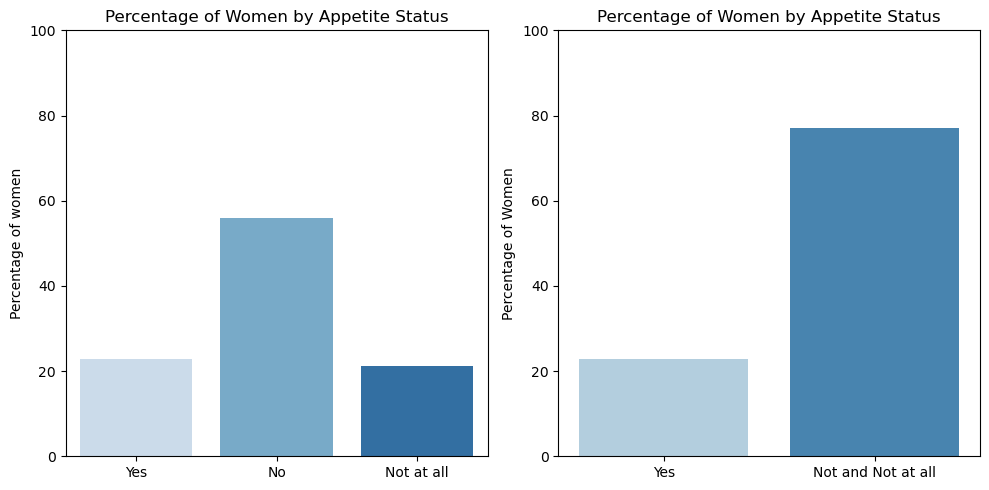

In [32]:
# חישוב האחוזים
total_count = postp_df['Overeating or loss of appetite'].count()
yes_count = postp_df['Overeating or loss of appetite'].value_counts()['Yes']

# חישוב האחוזים עבור הגרף הראשון
appetite_percentage = postp_df['Overeating or loss of appetite'].value_counts(normalize=True) * 100
no_percentage = (total_count - yes_count) / total_count * 100
yes_percentage = yes_count / total_count * 100

# יצירת הגרף השני
plt.figure(figsize=(10, 5))

# גרף שני - התיאוריה
ax1=plt.subplot(1, 2, 1)
sns.barplot(x=appetite_percentage.index, y=appetite_percentage.values, order=["Yes", "No", "Not at all"], palette="Blues")
plt.ylim(0, 100)
plt.xlabel('Overeating or loss of appetite')
plt.ylabel('Percentage of women')
plt.title('Percentage of Women by Appetite Status')
ax1.set_xlabel("")

# חישוב האחוזים עבור הגרף הראשון
appetite_percentage = postp_df['Overeating or loss of appetite'].value_counts(normalize=True) * 100

# גרף ראשון
ax2=plt.subplot(1, 2, 2)
sns.barplot(x=['Yes', 'Not and Not at all'], y=[yes_percentage, no_percentage], order=['Yes', 'Not and Not at all'], palette="Blues")
plt.ylim(0, 100)  # סט גבוה מקסימלי לגרף הימני
plt.xlabel('Overeating or loss of appetite')
plt.ylabel('Percentage of Women')
plt.title('Percentage of Women by Appetite Status')
ax2.set_xlabel("")

# הצגת הגרפים
plt.tight_layout()
plt.show()


# מסקנה 2   
   The most notable observation is that the majority of women responded with "No" in the category "Overeating or loss of appetite."
This emphasizes that significantly more women reported not experiencing overeating or loss of appetite compared to those who did ("Yes" or "Not at all").
While there is still a subset of women who reported experiencing these issues, the clear majority did not, suggesting that for the majority, overeating or loss of appetite may not be a significant concern during the postpartum period.

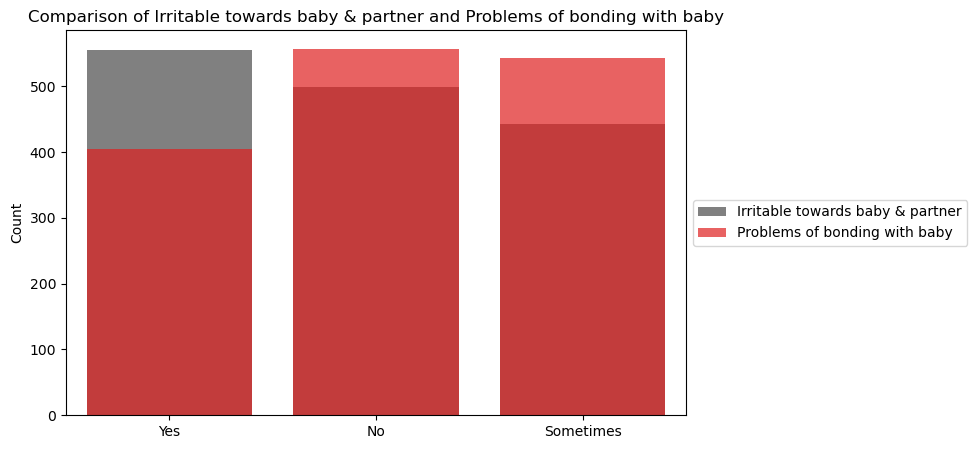

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the first bar plot (in red)
sns.countplot(data=postp_df, x="Irritable towards baby & partner", palette=["gray"], ax=ax,order=["Yes", "No", "Sometimes"])

# Plotting the second bar plot next to the first one (in beige)
sns.countplot(data=postp_df, x="Problems of bonding with baby", palette=["red"], ax=ax, alpha=0.7, order=["Yes", "No", "Sometimes"])

# Setting the title and labels
ax.set_title("Comparison of Irritable towards baby & partner and Problems of bonding with baby")
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_xlabel("")


# Adding legend
ax.legend(["Irritable towards baby & partner", "Problems of bonding with baby"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [34]:
orirritablebondingsyes = postp_df[(postp_df['Irritable towards baby & partner'] == 'Yes') | (postp_df['Problems of bonding with baby'] == 'Yes')]
num_or_irritable_bondingsyes = len(orirritablebondingsyes)
num_or_irritable_bondingsyes


793

In [35]:
bothirritablebondingsyes = postp_df[(postp_df['Irritable towards baby & partner'] == 'Yes') & (postp_df['Problems of bonding with baby'] == 'Yes')]
num_both_irritable_bondingsyes = len(bothirritablebondingsyes)
num_both_irritable_bondingsyes

166

מחשיבה מקדימה של היכרות עם דיכאון לאחר לידה , אנו נוטים לחשוב כי ישנו חוסר חיבור עם התינוק בנוסף לעצבנות כלפי הבעל והתינוק, ולמרבה הפתעתנו נוכל לראות כי כמות הנשים שחוות רק אחד מהתסמינים , גבוהה יותר בהרבה מאשר כמות הנשים שחוות את שני התסמינים יחד(לא צריך לכתוב את זה - רק לכתוב לעצמנו, להוריד את זה לקראת הסוף) 

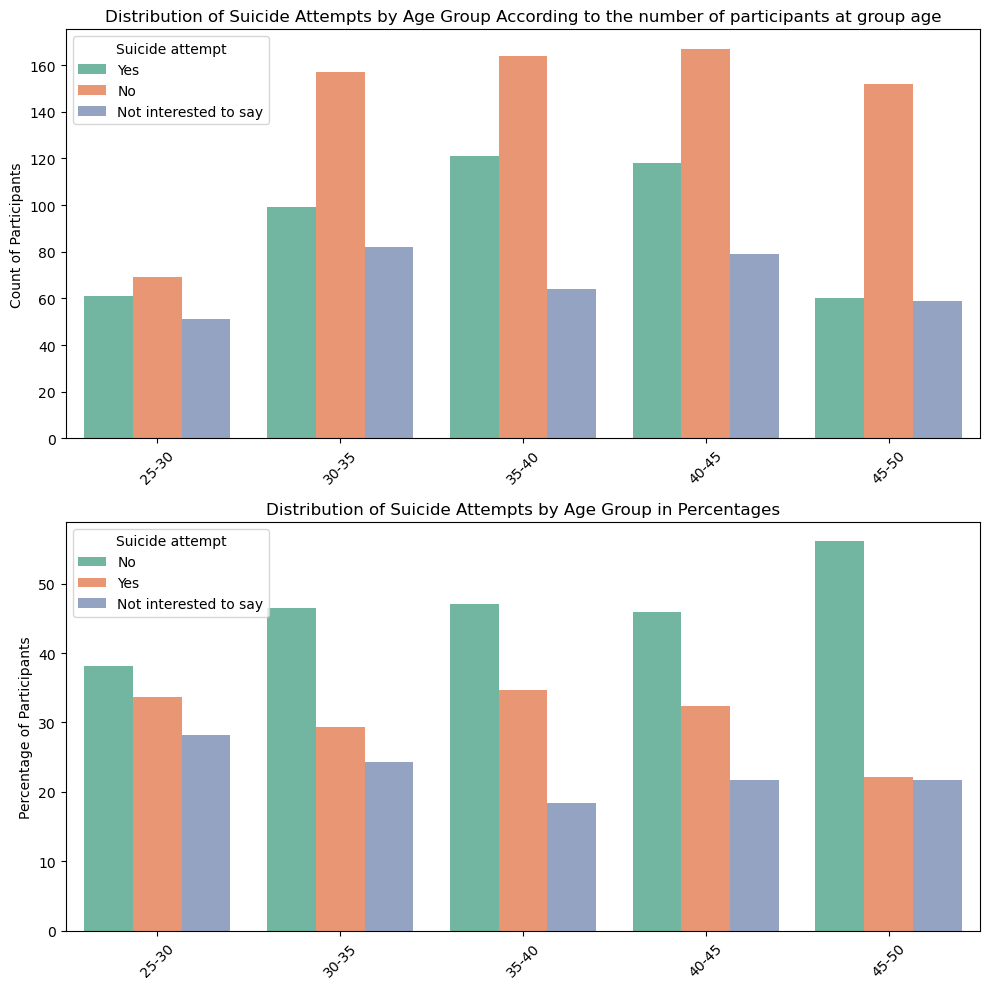

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

column_order = ["25-30", "30-35", "35-40", "40-45", "45-50"]
sns.countplot(x='Age', hue='Suicide attempt', data=postp_df, palette='Set2', order=column_order, ax=ax1)

ax1.set_title('Distribution of Suicide Attempts by Age Group According to the number of participants at group age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count of Participants')

ax1.legend(title='Suicide attempt', loc='upper left')  
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel("")

suicide_attempt_percentage = postp_df.groupby('Age')['Suicide attempt'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
column_order = ["25-30", "30-35", "35-40", "40-45", "45-50"]

sns.barplot(x='Age', y='Percentage', hue='Suicide attempt', data=suicide_attempt_percentage, palette='Set2', order=column_order, ax=ax2)

ax2.set_title('Distribution of Suicide Attempts by Age Group in Percentages')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Percentage of Participants')

ax2.legend(title='Suicide attempt', loc='upper left')  
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel("")

plt.tight_layout()
plt.show()


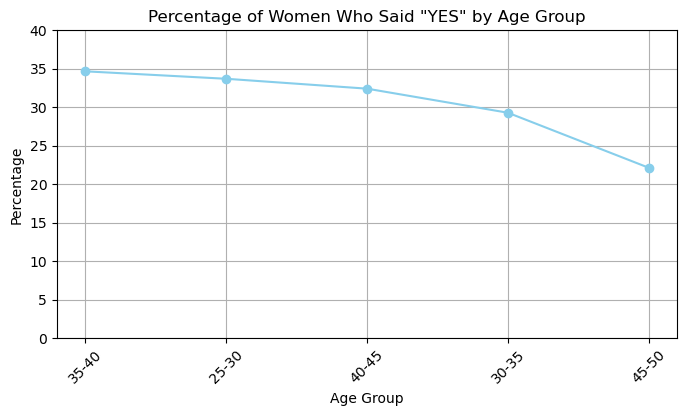

In [37]:
import matplotlib.pyplot as plt

column_order = ["Yes", "No", "Two or more days a week"]

age_groups = ["25-30", "30-35", "35-40", "40-45", "45-50"]
percentages = []

for age_group in age_groups:
    women_yes = postp_df[(postp_df['Age'] == age_group) & (postp_df['Suicide attempt'] == 'Yes')]
    percentage_yes = (len(women_yes) / len(postp_df[postp_df['Age'] == age_group])) * 100
    percentages.append(percentage_yes)
  
sorted_indices = sorted(range(len(percentages)), key=lambda i: percentages[i], reverse=True)
sorted_age_groups = [age_groups[i] for i in sorted_indices]
sorted_percentages = [percentages[i] for i in sorted_indices]

plt.figure(figsize=(8, 4))
plt.plot(sorted_age_groups, sorted_percentages, marker='o', color='skyblue', linestyle='-')
plt.title('Percentage of Women Who Said "YES" by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# מסקנה 3


Using the third graph, which focuses on the percentage of women who answered "yes," we can conclude:
In the 25-30 age range, the percentage of women who attempted suicide is the same/larger than in the other age groups, while in this group, there is a smaller number of women.
In the first graph, we can see the number of women who answered "yes" to a "suicide attempt," while in the second graph, we can see the percentage of women who answered the questionnaires in each age range.
According to the transition from a graph of quantities to percentages, it is clear to conclude that the largest percentage of women who refrained from answering the question is in the smallest age group with the least amount.


In [38]:
totalanxOrsad = postp_df[(postp_df['Feeling anxious'] == 'Yes') | (postp_df["Feeling sad or Tearful"] == 'Yes')]
num_totalanxOrsad = len(totalanxOrsad)
num_totalanxOrsad

1169

we can see that more than three-quarters of one percent of women reported feeling anxious or sad.

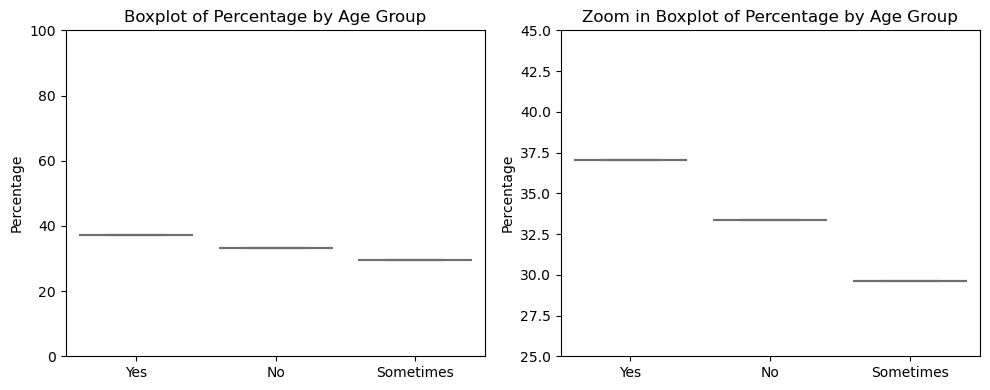

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sizes = [555, 499, 443]
total_counts = sum(sizes)
percentages = [(count / total_counts) * 100 for count in sizes]
labels = ["Yes", "No", "Sometimes"]


data = pd.DataFrame({'Age Group': labels, 'Percentage': percentages})

plt.figure(figsize=(10, 4))
ax1=plt.subplot(1, 2, 1)
sns.boxplot(x='Age Group', y='Percentage', data=data, palette="pastel")
plt.title("Boxplot of Percentage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.ylim(0, 100)

ax2=plt.subplot(1, 2, 2)
sns.boxplot(x='Age Group', y='Percentage', data=data, palette="pastel")
plt.title("Zoom in Boxplot of Percentage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.ylim(25,45)
ax1.set_xlabel("")
ax2.set_xlabel("")
plt.tight_layout()
plt.show()


The distribution of attitudes towards the baby and the partner is one third for each of the answers. Therefore, attitudes towards the baby or the partner will not necessarily be initial symptoms of postpartum depression

In [40]:
value_counts = postp_df["Feeling sad or Tearful"].value_counts()
df_value_counts = pd.DataFrame(value_counts)
df_value_counts.reset_index(inplace=True)

df_value_counts.columns = ["Feeling sad or Tearful", "Amount"]

df_value_counts


,Feeling sad or Tearful,Amount
0,Yes,536
1,No,524
2,Sometimes,443


The symptom of postpartum anxiety and distress does not singularly indicate postpartum depression. Additional symptoms are likely present. It is advisable for healthcare providers and family members surrounding the new mother to be attentive to other symptoms.

## Feeling anxious? Probably you'll feel like that for the next few years :)

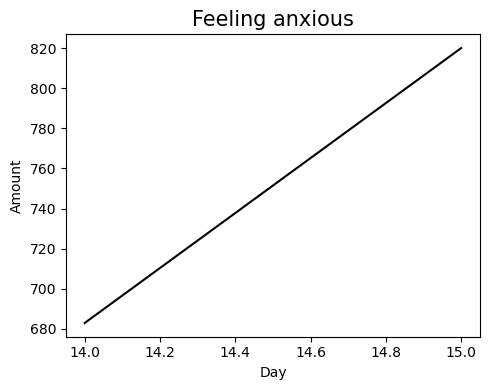

In [41]:
postp_df['Timestamp'] = pd.to_datetime(postp_df['Timestamp'])
postp_df['year'] = postp_df['Timestamp'].dt.year
postp_df['month'] = postp_df['Timestamp'].dt.month
postp_df['day'] = postp_df['Timestamp'].dt.day

day_counts = postp_df["day"].value_counts()
plt.figure(figsize=(5, 4))  
day_counts.plot(color='black')

plt.title('Feeling anxious', fontsize=15)  
plt.xlabel('Day', fontsize=10)   
plt.ylabel('Amount', fontsize=10) 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()


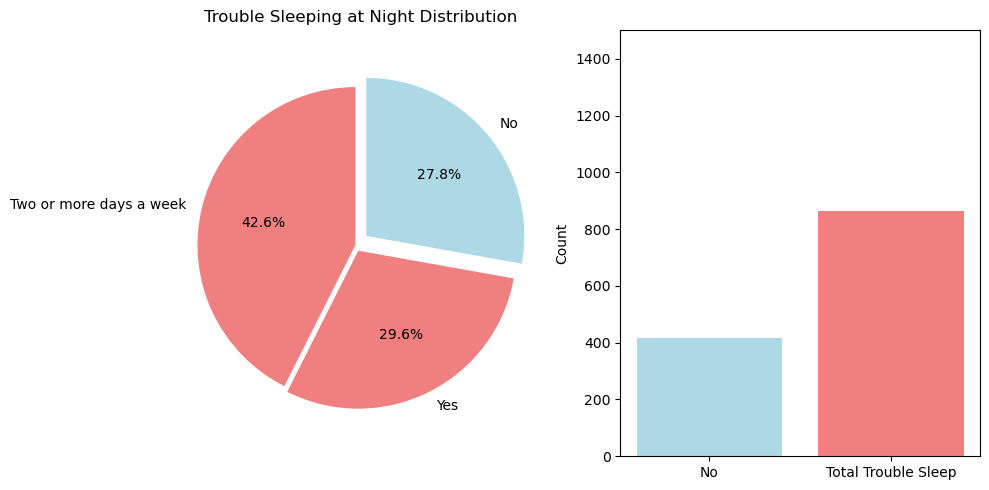

In [42]:
plt.figure(figsize=(10, 5))

 
plt.subplot(1, 2, 1)
trouble_sleep_counts = postp_df["Trouble sleeping at night"].value_counts()
trouble_sleep_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightcoral','lightblue'], explode=(0, 0.04, 0.09))
 
plt.title('Trouble Sleeping at Night Distribution')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')


total_count = postp_df['Trouble sleeping at night'].count()
yes_count = postp_df['Trouble sleeping at night'].value_counts()['Yes']
no_count = postp_df['Trouble sleeping at night'].value_counts()['No']
problem_sleep = yes_count + no_count


ax2=plt.subplot(1, 2, 2)
plt.bar(['No', 'Total Trouble Sleep'], [no_count, problem_sleep], color=['lightblue', 'lightcoral'])
plt.title(' ')
plt.xlabel('Trouble Sleeping at Night')
plt.ylabel('Count')
plt.ylim(0, 1500)
ax2.set_xlabel("")
plt.tight_layout()
plt.show()


Two thirds of the subjects experienced difficulty sleeping. Therefore, it can be concluded unequivocally that sleep disorders may be used as a marker for postpartum depression!

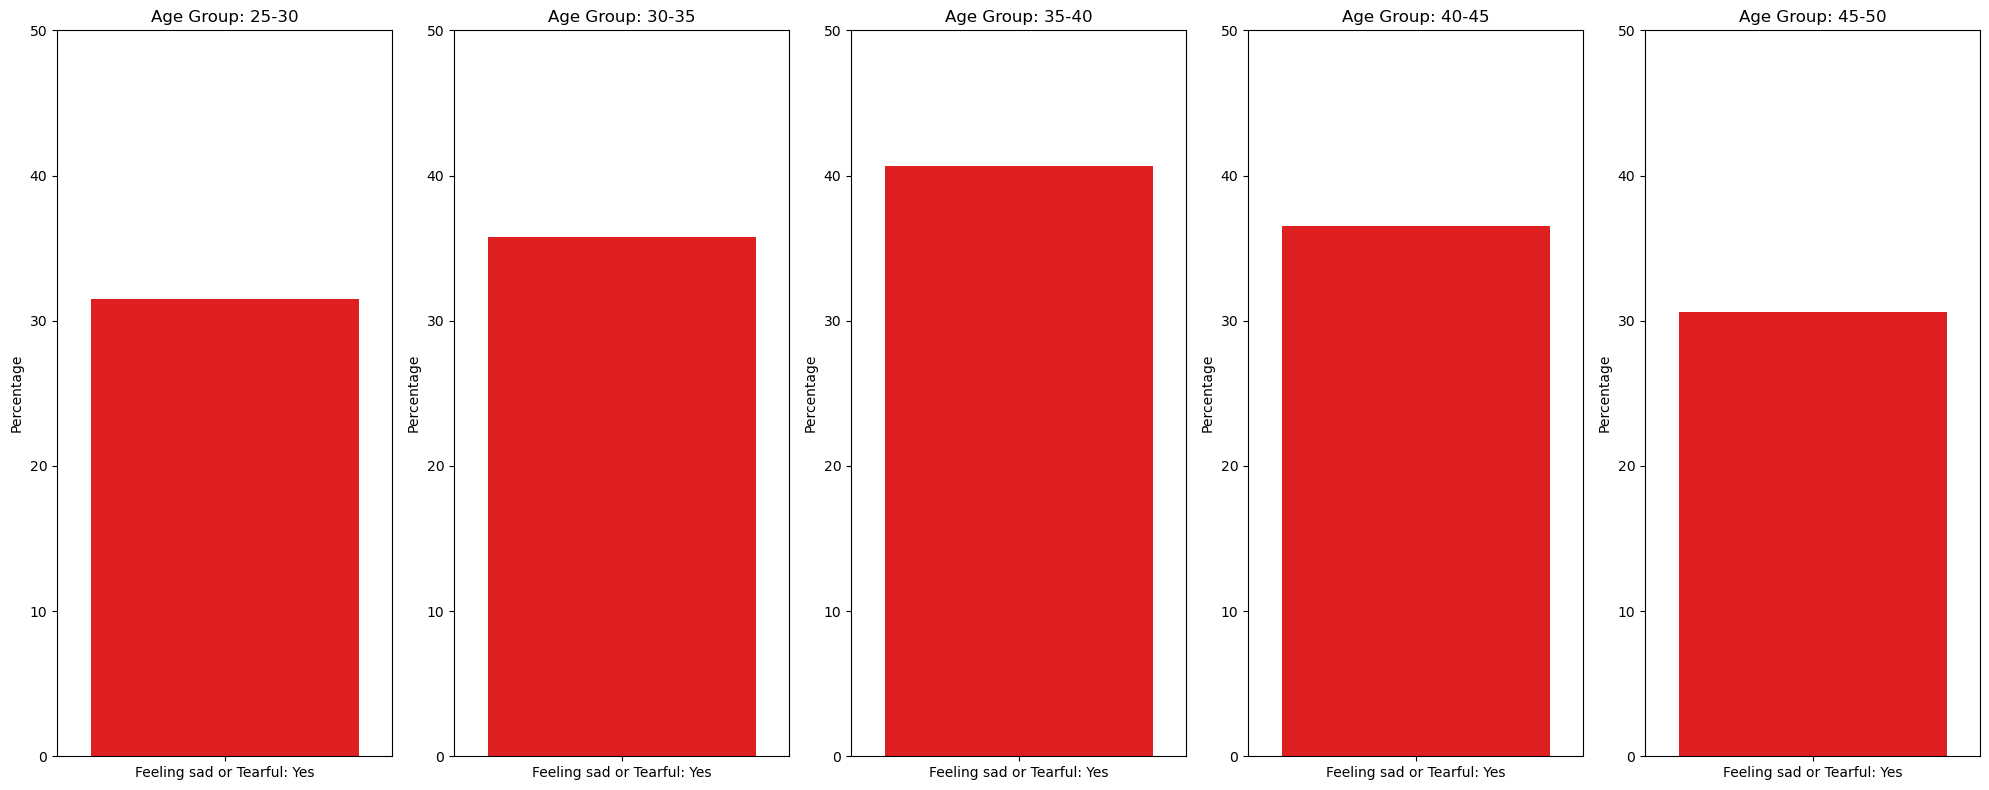

In [43]:
fig, axes = plt.subplots(figsize=(20, 8), ncols=5)

age_groups = ['25-30', '30-35', '35-40', '40-45', '45-50']

for i, age_group in enumerate(age_groups):
    count_feeling_sad = postp_df[(postp_df['Age'] == age_group) & (postp_df['Feeling sad or Tearful'] == 'Yes')].shape[0]
    
    total_women_in_group = postp_df[postp_df['Age'] == age_group].shape[0]
    percentage = (count_feeling_sad / total_women_in_group) * 100

    sns.barplot(ax=axes[i], x=['Feeling sad or Tearful: Yes'], y=[percentage], color='Red')
    axes[i].set_title(f'Age Group: {age_group}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 50)  

plt.tight_layout()
plt.show()

In [44]:
age_groups = ['25-30', '45-50']

for i, age_group in enumerate(age_groups):
    count_feeling_sad = postp_df[(postp_df['Age'] == age_group) & (postp_df['Feeling sad or Tearful'] == 'Yes')].shape[0]
    
    total_women_in_group = postp_df[postp_df['Age'] == age_group].shape[0]
    percentage = (count_feeling_sad / total_women_in_group) * 100
    print(percentage)

31.491712707182316
30.627306273062732


# מסקנה 4
By checking the cause to the high number of Suicide attempt by women we surprized to see that despite the "25-30" group has the highest percentages of "Suicide attempt",the youngest group's percentages of "Feeling Sad Or Tearful" was almost the lowest.

In [45]:
FeelingSadOrTearful_map = {"No": 1, 'Sometimes': 2, 'Yes': 3}
IrritableTowardsBabyPartner_map = {"No": 1, 'Sometimes': 2, 'Yes': 3}
TroubleSleepingAtNight_map = {"No": 1, "Two or more days a week": 2, "Yes": 3}
ProblemsConcentratingOrMakingDecision_map = {"No": 1, "Often": 2, "Yes": 3}
OvereatingOrLossOfAppetite_map = {"No": 1, "Not at all": 2, "Yes": 3}
FeelingAnxious_map = {"No": 1, "Yes": 3}
FeelingOfGuilt_map = {"No": 1, "Maybe": 2, "Yes": 3}
ProblemsOfBondingWithBaby_map = {"No": 1, "Sometimes": 2, "Yes": 3}
SuicideAttempt_map = {"No": 1, "Not interested to say": 2, "Yes": 3}

In [46]:
data = pd.DataFrame([])
data['Feeling sad or Tearful numric']=postp_df['Feeling sad or Tearful'].map(FeelingSadOrTearful_map)
data['Irritable towards baby & partner numric']=postp_df['Irritable towards baby & partner'].map(IrritableTowardsBabyPartner_map)
data['Trouble sleeping at night numric']=postp_df['Trouble sleeping at night'].map(TroubleSleepingAtNight_map)
data['Problems concentrating or making decision numric']=postp_df['Problems concentrating or making decision'].map(ProblemsConcentratingOrMakingDecision_map)
data['Overeating or loss of appetite numric']=postp_df['Overeating or loss of appetite'].map(OvereatingOrLossOfAppetite_map)
data['Feeling anxious numric']=postp_df['Feeling anxious'].map(FeelingAnxious_map)
data['Feeling of guilt numric']=postp_df['Feeling of guilt'].map(FeelingOfGuilt_map)
data['Problems of bonding with baby numric']=postp_df['Problems of bonding with baby'].map(ProblemsOfBondingWithBaby_map)
data['Suicide attempt numric']=postp_df['Suicide attempt'].map(SuicideAttempt_map)


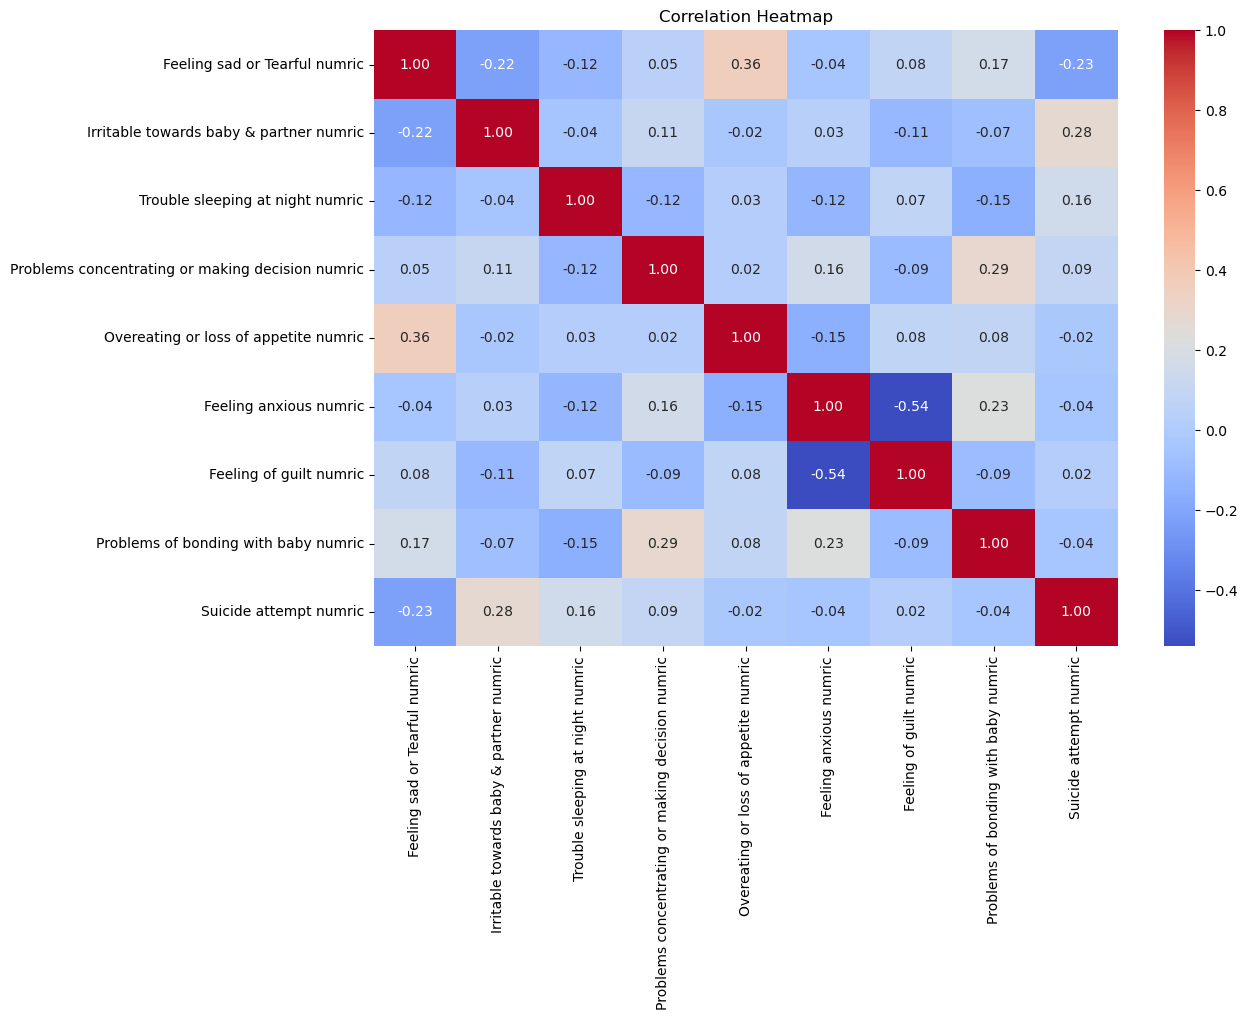

In [47]:
#data_slice
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [48]:
import base64
from PIL import Image
import io

def resize_image_from_base64(encoded_image, max_dimension):
    # Decode the base64 encoded image string
    decoded_image = base64.b64decode(encoded_image)
    
    # Convert the decoded image to bytes
    image_bytes = io.BytesIO(decoded_image)
    
    # Read the bytes data from image_bytes
    image_bytes_data = image_bytes.read()
    
    # Open the image
    img = Image.open(io.BytesIO(image_bytes_data))
    
    # Get the current dimensions
    width, height = img.size
    
    # Determine the scale factor to fit within the maximum dimension
    scale_factor = min(max_dimension / width, max_dimension / height, 1)
    
    # Calculate the new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    # Resize the image
    resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)
    
    return resized_img

# Example usage
encoded_image = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAFvAmQDASIAAhEBAxEB/8QAGgABAQEBAQEBAAAAAAAAAAAAAAUEAwIBBv/EABQBAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhADEAAAAv1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADNjKqWKiXkL6F1LDh3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGHdGNW8AEO5KNugJNaVVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH5f9LBP0KdRAE+h5OOiZTJdTINYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPkupJPvXdgKP389rK0ynLKHQEexkNbDuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHib9GazNK0ymM+Cv5E3N8LwAJNaVVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEjNUO8zR8JejrlLfeFoKr8/+g width="200"



SyntaxError: unterminated string literal (detected at line 34) (2870073326.py, line 34)

In [49]:
import base64
from PIL import Image
import io

def resize_image_from_base64(encoded_image, max_dimension):
    # Decode the base64 encoded image string
    decoded_image = base64.b64decode(encoded_image)
    
    # Convert the decoded image to bytes
    image_bytes = io.BytesIO(decoded_image)
    
    # Open the image
    img = Image.open(image_bytes)
    
    # Get the current dimensions
    width, height = img.size
    
    # Determine the scale factor to fit within the maximum dimension
    scale_factor = min(max_dimension / width, max_dimension / height, 1)
    
    # Calculate the new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    # Resize the image
#    resized_img = img.resize((new_width,new_height), Image.Resampling.LANCZOS)
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    return resized_img

# Example usage
<div>
<img 
#encoded_image ="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%95.png?raw=true width="400"/>

max_dimension = 2 ** 16  # Maximum dimension in each direction
first_image = resize_image_from_base64(encoded_image, max_dimension)
second_image_64 =
third_image_64 =
fourth_image_64 =
fifth_image_64 =

second_image = resize_image_from_base64(second_image_64, max_dimension)
third_image = resize_image_from_base64(third_image_64, max_dimension)
fourth_image = resize_image_from_base64(fourth_image_64, max_dimension)
fifth_image = resize_image_from_base64(fifth_image_64, max_dimension)

# Save or display the resized image
first_image.show()  # Display the resized image


SyntaxError: invalid syntax (3718174543.py, line 32)

<a id='top'></a>

<div>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%91.jpg?raw=true" width="100"/>
    <h4> 25-30</h4>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true " width="150"/>
    <h4> 30-35</h4>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%94.jpg?raw=true " width="170"/>
    <h4> 35-40</h4>
    <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%93%D7%93.jpg?raw=true" width="190"/>
    <h4> 40-45</h4>
    <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%92.jpg?raw=true" width="120"/>
    <h4> 45-50</h4> 
   

</div>



<a id='top'></a>

<div>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%91.jpg?raw=true" width="100"/>
    <h4> 25-30</h4>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true " width="150"/>
    <h4> 30-35</h4>
<img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%94.jpg?raw=true " width="170"/>
    <h4> 35-40</h4>
    <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%93%D7%93.jpg?raw=true" width="190"/>
    <h4> 40-45</h4>
    <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%92.jpg?raw=true" width="120"/>
    <h4> 45-50</h4> 
   

</div>



<div style="display: flex; flex-direction: row; align-items: center; justify-content: center;">
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>25-30 : 12.0% </h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>30-35 : 22.5% </h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>35-40 : 23.2% </h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>40-45 : 24.2% </h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>45-50 : 18.0% </h4>
    </div>
</div>


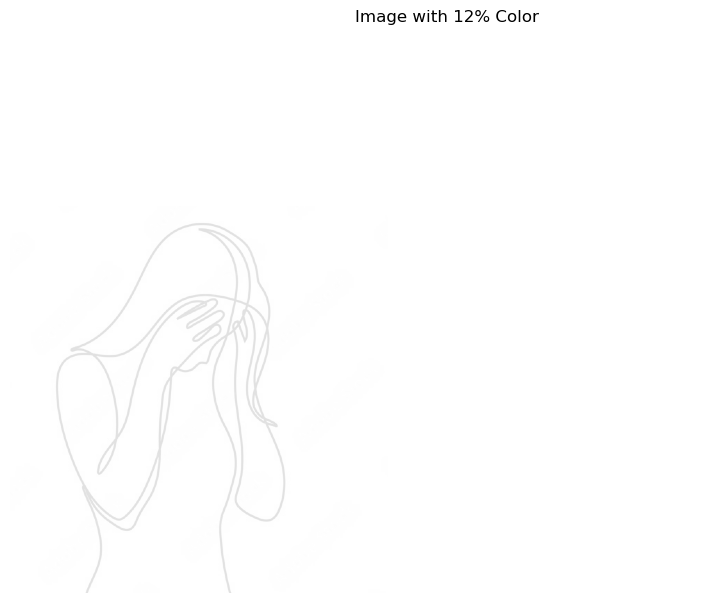

In [60]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from io import BytesIO
import requests
import numpy as np

# Image URL
image_url = "https://github.com/sivanhiya/sivanhiya/blob/main/%D7%90%D7%90.png?raw=true"

def image_to_array(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_array = np.array(img)
    return img_array

# Create a scatter plot
fig, ax = plt.subplots()

# Load the image from the URL
img_array = image_to_array(image_url)

# Set 12% opacity for the entire image
img_array[:, :, 3] = 0.12 * 255  # Opacity values range from 0 to 255

# Plot the image with 12% color
imagebox = OffsetImage(img_array, zoom=0.5)
ab = AnnotationBbox(imagebox, (0, 0), frameon=False, xycoords='data', boxcoords="data", pad=0)
ax.add_artist(ab)

# Set labels and title
ax.set_xlabel('Image')
ax.set_ylabel('Color Transparency')
ax.set_title('Image with 12% Color')

# Hide axis
ax.axis('off')

plt.show()


<div style="display: flex; flex-direction: row; align-items: center; justify-content: center;">
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>25-30<br>12.0%</h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>30-35<br>22.5%</h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>35-40<br>23.2%</h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>40-45<br>24.2%</h4>
    </div>
    <div style="text-align: center;">
        <img src="https://github.com/sivanhiya/sivanhiya/blob/main/%D7%96.jpg?raw=true" width="170"/>
        <h4>45-50<br>18.0%</h4>
    </div>
</div>


In [70]:
FeelingSadOrTearful_map = {"No": 1, "Sometimes": 2, 'Yes': 3}
IrritableTowardsBabyPartner_map = {"No": 1, "Sometimes": 2, 'Yes': 3}
TroubleSleepingAtNight_map = {"No": 1, "Two or more days a week": 2, "Yes": 3}
ProblemsConcentratingOrMakingDecision_map = {"No": 1, "Often": 2, "Yes": 3}
OvereatingOrLossOfAppetite_map = {"No": 1, "Not at all": 2, "Yes": 3}
FeelingAnxious_map = {"No": 1, "Yes": 3}
FeelingOfGuilt_map = {"No": 1, "Maybe": 2, "Yes": 3}
ProblemsOfBondingWithBaby_map = {"No": 1, "Sometimes": 2, "Yes": 3}
SuicideAttempt_map = {'No': 1, "Not interested to say": 2, "Yes": 3}

In [71]:
postp_df['Feeling sad or Tearful numric']=postp_df['Feeling sad or Tearful'].map(FeelingSadOrTearful_map)
postp_df['Irritable towards baby & partner numric']=postp_df['Irritable towards baby & partner'].map(IrritableTowardsBabyPartner_map)
postp_df['Trouble sleeping at night numric']=postp_df['Trouble sleeping at night'].map(TroubleSleepingAtNight_map)
postp_df['Problems concentrating or making decision numric']=postp_df['Problems concentrating or making decision'].map(ProblemsConcentratingOrMakingDecision_map)
postp_df['Overeating or loss of appetite numric']=postp_df['Overeating or loss of appetite'].map(OvereatingOrLossOfAppetite_map)
postp_df['Feeling anxious numric']=postp_df['Feeling anxious'].map(FeelingAnxious_map)
postp_df['Feeling of guilt numric']=postp_df['Feeling of guilt'].map(FeelingOfGuilt_map)
postp_df['Problems of bonding with baby numric']=postp_df['Problems of bonding with baby'].map(ProblemsOfBondingWithBaby_map)
postp_df['Suicide attempt numric']=postp_df['Suicide attempt'].map(SuicideAttempt_map)

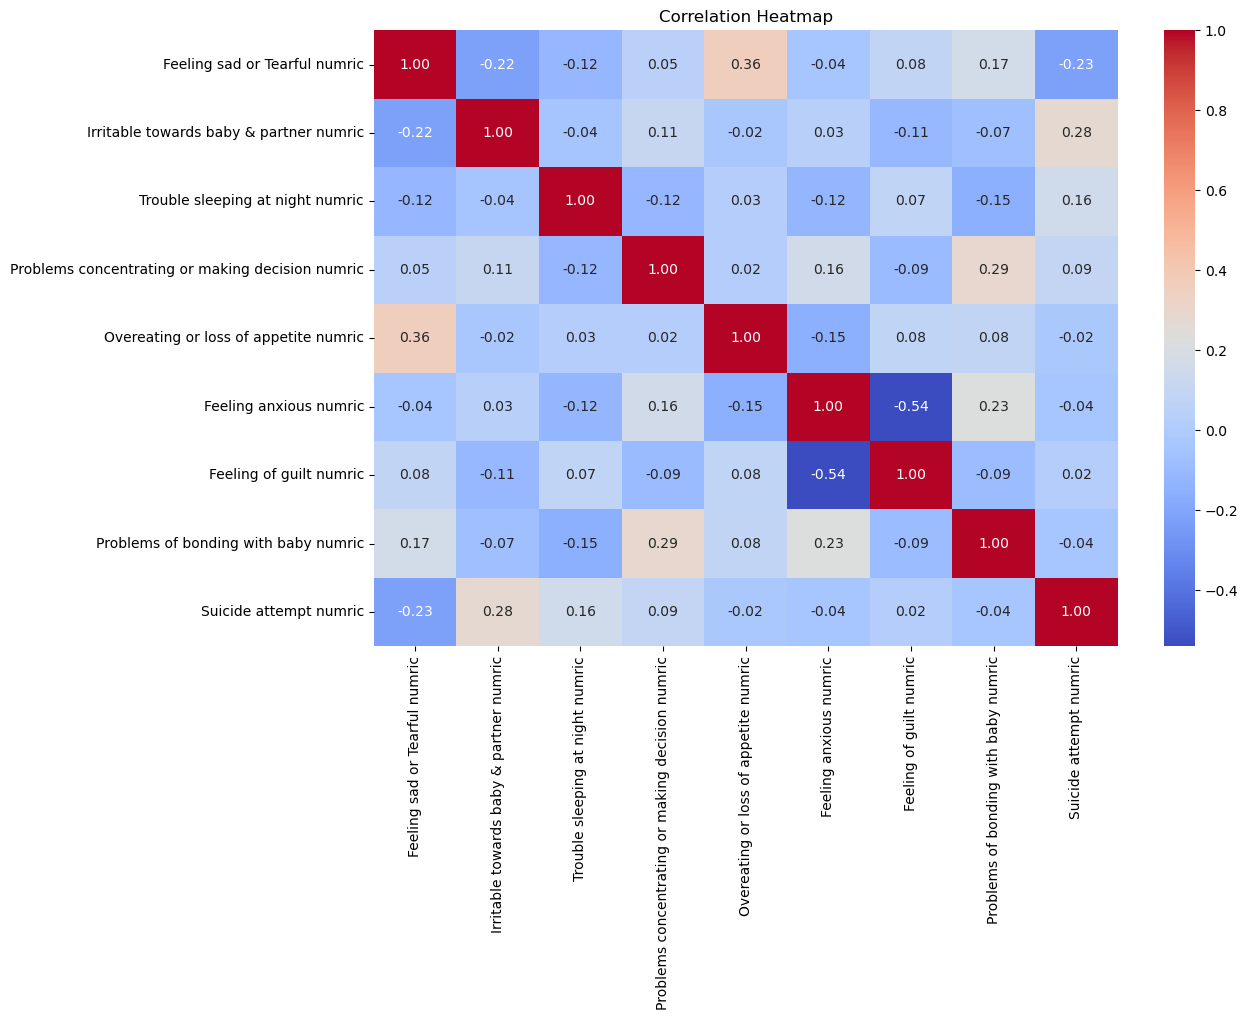

In [73]:

numeric_columns = postp_df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [80]:
# Print all column names to identify any discrepancies
print(postp_df.columns)

# Update the features list to match the correct column names
features = ['Age', 'Feeling sad or Tearful numeric', 'Irritable towards baby & partner numeric', 
            'Trouble sleeping at night numeric', 'Problems concentrating or making decision numeric',
            'Overeating or loss of appetite numeric', 'Feeling anxious numeric', 
            'Feeling of guilt numeric', 'Problems of bonding with baby numeric', 'Suicide attempt numeric']

# Now try accessing the columns again
post_df = pd.get_dummies(postp_df[features])

# Plot the heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = post_df.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'year', 'month',
       'day', 'Feeling sad or Tearful numric',
       'Irritable towards baby & partner numric',
       'Trouble sleeping at night numric',
       'Problems concentrating or making decision numric',
       'Overeating or loss of appetite numric', 'Feeling anxious numric',
       'Feeling of guilt numric', 'Problems of bonding with baby numric',
       'Suicide attempt numric'],
      dtype='object')


KeyError: "['Feeling sad or Tearful numeric', 'Irritable towards baby & partner numeric', 'Trouble sleeping at night numeric', 'Problems concentrating or making decision numeric', 'Overeating or loss of appetite numeric', 'Feeling anxious numeric', 'Feeling of guilt numeric', 'Problems of bonding with baby numeric', 'Suicide attempt numeric'] not in index"

In [82]:
plt.figure(figsize=(12,6))
correlation_matrix = postp_df.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: '35-40'

<Figure size 1200x600 with 0 Axes>